In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
X_train_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_train_features.csv')
y_train_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_train_labels.csv')
X_val_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_validation_features.csv')
y_val_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_validation_labels.csv')
X_test_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_test_features.csv')
y_test_df = pd.read_csv('C:/Users/ankar/Desktop/summarization-models/src/Task2_Three-steps/final_test_labels.csv')

In [3]:
X_train_df.head(10)

,mean_sent_embeddings_art,max_cosine_similarity,position_score,normalized_sentence_length
0,[ 0.11470295 0.07583769 0.03558771 0.013642...,0.873671,1.000000,0.813953
1,[ 1.09430648e-01 9.66445729e-02 3.38673294e-...,0.823163,0.888889,0.488372
2,[ 1.04683712e-01 1.20787814e-01 1.57281291e-...,0.755216,0.777778,0.837209
3,[ 0.07752369 0.05999982 0.05990262 0.039984...,0.754140,0.666667,0.790698
4,[ 8.89244080e-02 6.59356713e-02 3.86481285e-...,0.833362,0.555556,0.395349
5,[ 5.72601333e-02 3.35411057e-02 5.97167984e-...,0.684376,0.444444,0.604651
6,[ 8.83114487e-02 4.13272269e-02 4.17721383e-...,0.638264,0.333333,0.558140
7,[ 0.07595825 0.07234375 0.02316772 -0.008095...,0.706105,0.222222,0.674419
8,[ 5.90871163e-02 7.29938075e-02 5.72619960e-...,0.674579,0.111111,1.000000
9,[ 4.43226211e-02 4.01916504e-02 2.65891328e-...,0.764515,0.000000,0.697674


In [4]:
X_train_df.columns

Index(['mean_sent_embeddings_art', 'max_cosine_similarity', 'position_score',
       'normalized_sentence_length'],
      dtype='object')

In [5]:
print(type(X_train_df['mean_sent_embeddings_art']))

<class 'pandas.core.series.Series'>


In [6]:
X_train_df['mean_sent_embeddings_art'].head(10)

0    [ 0.11470295  0.07583769  0.03558771  0.013642...
1    [ 1.09430648e-01  9.66445729e-02  3.38673294e-...
2    [ 1.04683712e-01  1.20787814e-01  1.57281291e-...
3    [ 0.07752369  0.05999982  0.05990262  0.039984...
4    [ 8.89244080e-02  6.59356713e-02  3.86481285e-...
5    [ 5.72601333e-02  3.35411057e-02  5.97167984e-...
6    [ 8.83114487e-02  4.13272269e-02  4.17721383e-...
7    [ 0.07595825  0.07234375  0.02316772 -0.008095...
8    [ 5.90871163e-02  7.29938075e-02  5.72619960e-...
9    [ 4.43226211e-02  4.01916504e-02  2.65891328e-...
Name: mean_sent_embeddings_art, dtype: object

In [7]:
# Check the type.
print(X_train_df['mean_sent_embeddings_art'].apply(type))

0          <class 'str'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
               ...      
1112073    <class 'str'>
1112074    <class 'str'>
1112075    <class 'str'>
1112076    <class 'str'>
1112077    <class 'str'>
Name: mean_sent_embeddings_art, Length: 1112078, dtype: object


In [8]:
# Convert into numpy for usability.

for df in [X_train_df, X_val_df, X_test_df]:
    df['mean_sent_embeddings_art'] = df['mean_sent_embeddings_art'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
    
print(X_train_df['mean_sent_embeddings_art'].apply(type))

0          <class 'numpy.ndarray'>
1          <class 'numpy.ndarray'>
2          <class 'numpy.ndarray'>
3          <class 'numpy.ndarray'>
4          <class 'numpy.ndarray'>
                    ...           
1112073    <class 'numpy.ndarray'>
1112074    <class 'numpy.ndarray'>
1112075    <class 'numpy.ndarray'>
1112076    <class 'numpy.ndarray'>
1112077    <class 'numpy.ndarray'>
Name: mean_sent_embeddings_art, Length: 1112078, dtype: object


In [9]:
X_train_embeddings = np.stack(X_train_df['mean_sent_embeddings_art'].values)
X_val_embeddings = np.stack(X_val_df['mean_sent_embeddings_art'].values)
X_test_embeddings = np.stack(X_test_df['mean_sent_embeddings_art'].values)

In [10]:
scalar_columns = ['max_cosine_similarity', 'position_score', 'normalized_sentence_length']

X_train_scalars = X_train_df[scalar_columns].to_numpy()
X_val_scalars = X_val_df[scalar_columns].to_numpy()
X_test_scalars = X_test_df[scalar_columns].to_numpy()

X_train_np = np.concatenate([X_train_embeddings, X_train_scalars], axis=1)
X_val_np = np.concatenate([X_val_embeddings, X_val_scalars], axis=1)
X_test_np = np.concatenate([X_test_embeddings, X_test_scalars], axis=1)

In [11]:
X_test_df.head(10)

,id,sentence_index,mean_sent_embeddings_art,max_cosine_similarity,position_score,normalized_sentence_length
0,f001ec5c4704938247d27a44948eebb37ae98d01,0,"[0.0186303705, 0.00751953106, 0.0457208268, -0...",0.827125,1.000000,0.638298
1,f001ec5c4704938247d27a44948eebb37ae98d01,1,"[-0.02634515, 0.07215711, 0.08659893, 0.027040...",0.613928,0.961538,0.468085
2,f001ec5c4704938247d27a44948eebb37ae98d01,2,"[0.0237233471, 0.0584208183, 0.0732615143, -0....",0.869043,0.923077,0.851064
3,f001ec5c4704938247d27a44948eebb37ae98d01,3,"[0.02453613, 0.07804362, 0.05803935, 0.0166117...",0.855858,0.884615,0.595745
4,f001ec5c4704938247d27a44948eebb37ae98d01,4,"[0.01475016, 0.04455566, 0.01999251, 0.0767059...",0.708244,0.846154,0.361702
5,f001ec5c4704938247d27a44948eebb37ae98d01,5,"[0.05249921, -0.00336052, 0.08644193, 0.070377...",0.796209,0.807692,0.510638
6,f001ec5c4704938247d27a44948eebb37ae98d01,6,"[-0.0287984218, 0.0153103936, 0.0537245013, 0....",0.588693,0.769231,0.510638
7,f001ec5c4704938247d27a44948eebb37ae98d01,7,"[-0.00697681, 0.01180376, 0.02394581, 0.023380...",0.680001,0.730769,0.893617
8,f001ec5c4704938247d27a44948eebb37ae98d01,8,"[-0.04153519, 0.06589355, 0.10364532, 0.101464...",0.524392,0.692308,0.361702
9,f001ec5c4704938247d27a44948eebb37ae98d01,9,"[0.0273790862, 0.0264009181, 0.08328408, 0.031...",0.624332,0.653846,0.531915


In [12]:
# Create new column for each sentence encoding the artcile it belongs to.
X_test_df['article-sentence'] = X_test_df['id'] + ' - ' + X_test_df['sentence_index'].astype(str)


In [13]:
# Check the new column. OK.
X_test_df.head() 


,id,sentence_index,mean_sent_embeddings_art,max_cosine_similarity,position_score,normalized_sentence_length,article-sentence
0,f001ec5c4704938247d27a44948eebb37ae98d01,0,"[0.0186303705, 0.00751953106, 0.0457208268, -0...",0.827125,1.000000,0.638298,f001ec5c4704938247d27a44948eebb37ae98d01 - 0
1,f001ec5c4704938247d27a44948eebb37ae98d01,1,"[-0.02634515, 0.07215711, 0.08659893, 0.027040...",0.613928,0.961538,0.468085,f001ec5c4704938247d27a44948eebb37ae98d01 - 1
2,f001ec5c4704938247d27a44948eebb37ae98d01,2,"[0.0237233471, 0.0584208183, 0.0732615143, -0....",0.869043,0.923077,0.851064,f001ec5c4704938247d27a44948eebb37ae98d01 - 2
3,f001ec5c4704938247d27a44948eebb37ae98d01,3,"[0.02453613, 0.07804362, 0.05803935, 0.0166117...",0.855858,0.884615,0.595745,f001ec5c4704938247d27a44948eebb37ae98d01 - 3
4,f001ec5c4704938247d27a44948eebb37ae98d01,4,"[0.01475016, 0.04455566, 0.01999251, 0.0767059...",0.708244,0.846154,0.361702,f001ec5c4704938247d27a44948eebb37ae98d01 - 4


In [14]:
X_test_ids = X_test_df['article-sentence'].tolist() 

In [15]:
type(X_test_ids)

list

In [16]:
X_test_articles =  X_test_df['id'].tolist()

In [17]:
type(X_test_articles)

list

In [18]:
X_test_articles

['f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c4704938247d27a44948eebb37ae98d01',
 'f001ec5c

In [19]:
X_test_df =  X_test_df.drop(columns =['id', 'sentence_index', 'article-sentence'])

In [20]:
X_test_df.head(10)

,mean_sent_embeddings_art,max_cosine_similarity,position_score,normalized_sentence_length
0,"[0.0186303705, 0.00751953106, 0.0457208268, -0...",0.827125,1.000000,0.638298
1,"[-0.02634515, 0.07215711, 0.08659893, 0.027040...",0.613928,0.961538,0.468085
2,"[0.0237233471, 0.0584208183, 0.0732615143, -0....",0.869043,0.923077,0.851064
3,"[0.02453613, 0.07804362, 0.05803935, 0.0166117...",0.855858,0.884615,0.595745
4,"[0.01475016, 0.04455566, 0.01999251, 0.0767059...",0.708244,0.846154,0.361702
5,"[0.05249921, -0.00336052, 0.08644193, 0.070377...",0.796209,0.807692,0.510638
6,"[-0.0287984218, 0.0153103936, 0.0537245013, 0....",0.588693,0.769231,0.510638
7,"[-0.00697681, 0.01180376, 0.02394581, 0.023380...",0.680001,0.730769,0.893617
8,"[-0.04153519, 0.06589355, 0.10364532, 0.101464...",0.524392,0.692308,0.361702
9,"[0.0273790862, 0.0264009181, 0.08328408, 0.031...",0.624332,0.653846,0.531915


In [21]:
type(y_train_df)

pandas.core.frame.DataFrame

In [22]:
y_train_np = np.array(y_train_df).squeeze()
y_val_np = np.array(y_val_df).squeeze()
y_test_np = np.array(y_test_df).squeeze()

In [23]:
type(y_train_np)

numpy.ndarray

In [24]:
type(X_train_np)

numpy.ndarray

In [28]:
# param_grid = {
    #'class_weight' : [None],
    #'C': [0.01, 0.1], # Regularization parameter
    #'penalty': ['l1', 'l2', 'elasticnet'], # Norm used in the penalization
    #'solver': ['saga'], # Saga solver supports all penalties
    #'max_iter': [500] # Maximum number of iterations
#}

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=500, C=0.1, penalty='l1', solver='saga', n_jobs=-1)
#Precision in order to minimize the False Positives, in order to avoid  excessive labelling with 1 sentences 
#which are not summary-worthy.

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_val_scaled = scaler.transform(X_val_np)

# Set up GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, n_jobs=-1)

# Perform the grid search using the train set
clf.fit(X_train_scaled, y_train_np)

# Evaluate the best model on the validation set
y_val_pred = clf.predict(X_val_scaled)

# TIME: 5' 

# The best hyperparameters and the corresponding score
#print("Best hyperparameters during the grid search:", grid_search.best_params_)

In [29]:
# Generate the classification report
report = classification_report(y_val_np, y_val_pred)
print("Classification Report (Validation Set):")
print(report)

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     39496
           1       0.73      0.71      0.72      5348

    accuracy                           0.93     44844
   macro avg       0.85      0.84      0.84     44844
weighted avg       0.93      0.93      0.93     44844



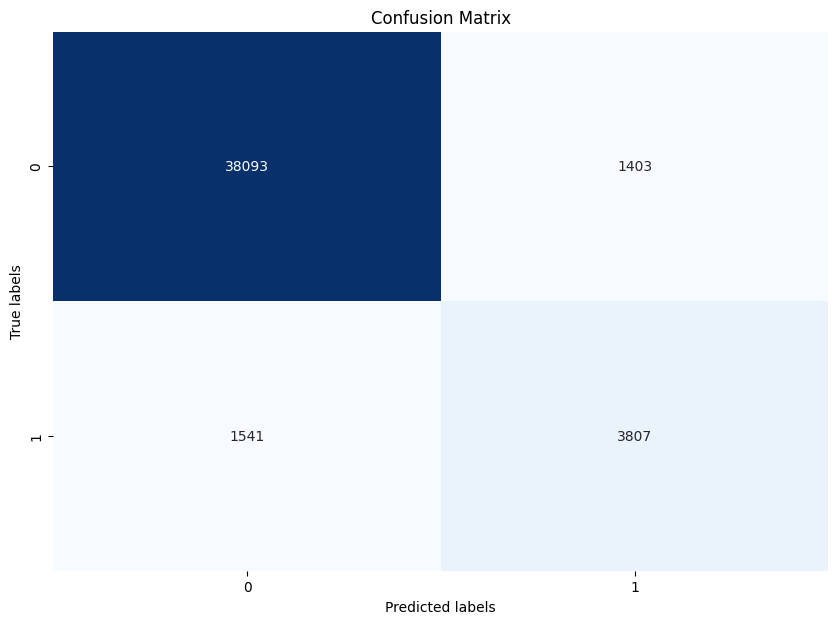

In [30]:
# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_val_np, y_val_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_val_np, y_val_pred)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8381661572310741


## Retrain with best parameters and make predictions on the test set

In [32]:
X_test_scaled = scaler.transform(X_test_np)

#clf.fit(X_train_scaled, y_train_np)

y_pred = clf.predict(X_test_scaled)

y_pred = y_pred.tolist()

In [33]:
final_df = pd.DataFrame(
    {'article': X_test_articles,
    'index': X_test_ids,
     'score': y_pred
    }).set_index('index', drop=True)

final_df.head()

,article,score
index,,
f001ec5c4704938247d27a44948eebb37ae98d01 - 0,f001ec5c4704938247d27a44948eebb37ae98d01,1
f001ec5c4704938247d27a44948eebb37ae98d01 - 1,f001ec5c4704938247d27a44948eebb37ae98d01,0
f001ec5c4704938247d27a44948eebb37ae98d01 - 2,f001ec5c4704938247d27a44948eebb37ae98d01,1
f001ec5c4704938247d27a44948eebb37ae98d01 - 3,f001ec5c4704938247d27a44948eebb37ae98d01,1
f001ec5c4704938247d27a44948eebb37ae98d01 - 4,f001ec5c4704938247d27a44948eebb37ae98d01,0


In [34]:
# classification report
#report = classification_report(y_test_np, y_pred)
#print("Classification Report (Test Set):")
#print(report)

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    350118
           1       0.74      0.69      0.72     45954

    accuracy                           0.94    396072
   macro avg       0.85      0.83      0.84    396072
weighted avg       0.93      0.94      0.94    396072



In [35]:
output_df = final_df.sort_values(['article','score'], ascending=[1,0]).groupby('article').head(3)
output_df.head()

,article,score
index,,
000571afe702684d90c1d222ce70b1e1375c1016 - 3,000571afe702684d90c1d222ce70b1e1375c1016,1
000571afe702684d90c1d222ce70b1e1375c1016 - 8,000571afe702684d90c1d222ce70b1e1375c1016,1
000571afe702684d90c1d222ce70b1e1375c1016 - 0,000571afe702684d90c1d222ce70b1e1375c1016,0
000642916e3a6c33411c617cf2f3c134a206fba8 - 0,000642916e3a6c33411c617cf2f3c134a206fba8,1
000642916e3a6c33411c617cf2f3c134a206fba8 - 3,000642916e3a6c33411c617cf2f3c134a206fba8,1


In [36]:
selected_sentences = output_df.index.values
selected_sentences = selected_sentences.tolist()

print(selected_sentences)

['000571afe702684d90c1d222ce70b1e1375c1016 - 3', '000571afe702684d90c1d222ce70b1e1375c1016 - 8', '000571afe702684d90c1d222ce70b1e1375c1016 - 0', '000642916e3a6c33411c617cf2f3c134a206fba8 - 0', '000642916e3a6c33411c617cf2f3c134a206fba8 - 3', '000642916e3a6c33411c617cf2f3c134a206fba8 - 1', '00110802bc6eae0e8e4d3d22e27f458f41be2b22 - 4', '00110802bc6eae0e8e4d3d22e27f458f41be2b22 - 10', '00110802bc6eae0e8e4d3d22e27f458f41be2b22 - 13', '00119229166ae09a6ef25c0e10b101ef9eb9cca3 - 1', '00119229166ae09a6ef25c0e10b101ef9eb9cca3 - 3', '00119229166ae09a6ef25c0e10b101ef9eb9cca3 - 4', '0013aa16650fbcfbe6edb16ac614ad174cb5d1cf - 0', '0013aa16650fbcfbe6edb16ac614ad174cb5d1cf - 1', '0013aa16650fbcfbe6edb16ac614ad174cb5d1cf - 2', '00180b7ce54794a52766d795506a94071f7c055b - 4', '00180b7ce54794a52766d795506a94071f7c055b - 5', '00180b7ce54794a52766d795506a94071f7c055b - 6', '001ebaa80dca4a65adf2178b132113cb9e3d5431 - 1', '001ebaa80dca4a65adf2178b132113cb9e3d5431 - 4', '001ebaa80dca4a65adf2178b132113cb9e3d

In [37]:
y_pred = [1 if x in selected_sentences else 0 for x in X_test_ids]

y_pred_df = pd.DataFrame(
    {'y_pred': y_pred,
    })

print(y_pred_df.head(20))

    y_pred
0        1
1        0
2        1
3        1
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0


In [38]:
y_pred_df.to_csv('final_predictions.csv', index=False)

In [39]:
ls

 Volume in drive C is OS
 Volume Serial Number is 0497-C35C

 Directory of C:\Users\ankar\Desktop\summarization-models\src\Task2_Three-steps

10/01/2024  20:12    <DIR>          .
04/01/2024  01:21    <DIR>          ..
09/01/2024  23:07    <DIR>          .ipynb_checkpoints
10/01/2024  14:11           226,609 0. Data_Exploration.ipynb
10/01/2024  00:51           187,028 1. Preprocessing.ipynb
10/01/2024  19:45           564,330 2. Feature_Extraction.ipynb
10/01/2024  20:12         1,784,222 3. ML_models.ipynb
08/01/2024  22:27            19,109 4. Summary_generation.ipynb
09/01/2024  20:17             3,438 5. Finetuning bert-extractive-summarizer.ipynb
08/01/2024  21:36            43,069 all_highlights.txt
08/01/2024  22:07            43,069 all_highlights4.txt
08/01/2024  19:47           167,350 all_summaries.txt
08/01/2024  19:44           167,350 all_summaries2.txt
08/01/2024  19:47           167,350 all_summaries3.txt
08/01/2024  22:19            56,730 all_summaries4.txt
09/01/202